In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load the dataset - omit columns which may confuse the classification qlgorithm
data= pd.read_csv("obesity_clear.csv", usecols=lambda x: x not in ['Height', 'Weight', 'BMI'], index_col=0)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'Gender', 
    'overweight_in_family', 
    'high_cal_food', 
    'consumption_between_meals', 
    'is_smoking', 
    'calories_monitoring', 
    'alcohol_consumption', 
    'prefered_transportation', 
    'BMI_classification'
]

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['BMI_classification'])
y = data['BMI_classification']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(y.unique()),  # Number of target classes
    eval_metric='mlogloss',     # Multi-class log-loss
    random_state=42
)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print classification report for the test set
classification_report_output = classification_report(y_test, y_test_pred)
print("\nClassification Report for Test Set:\n", classification_report_output)

Training Accuracy: 0.9531990521327014
Test Accuracy: 0.7375886524822695

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.61      0.55      0.58        60
           2       0.75      0.82      0.79        74
           3       0.81      0.76      0.79        68
           4       0.86      0.89      0.87        54
           5       0.62      0.72      0.67        57
           6       0.62      0.52      0.56        56

    accuracy                           0.74       423
   macro avg       0.73      0.74      0.73       423
weighted avg       0.74      0.74      0.73       423



In [ ]:
!conda install graphviz -y

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Number of trees in the model
num_trees = xgb_model.get_booster().trees_to_dataframe().shape[0]

# Loop through all trees and plot them
for i in range(num_trees):
    plt.figure(figsize=(30, 15))
    plot_tree(xgb_model, num_trees=i)
    plt.title(f"Tree {i}")
    plt.show()

<Figure size 1000x800 with 0 Axes>

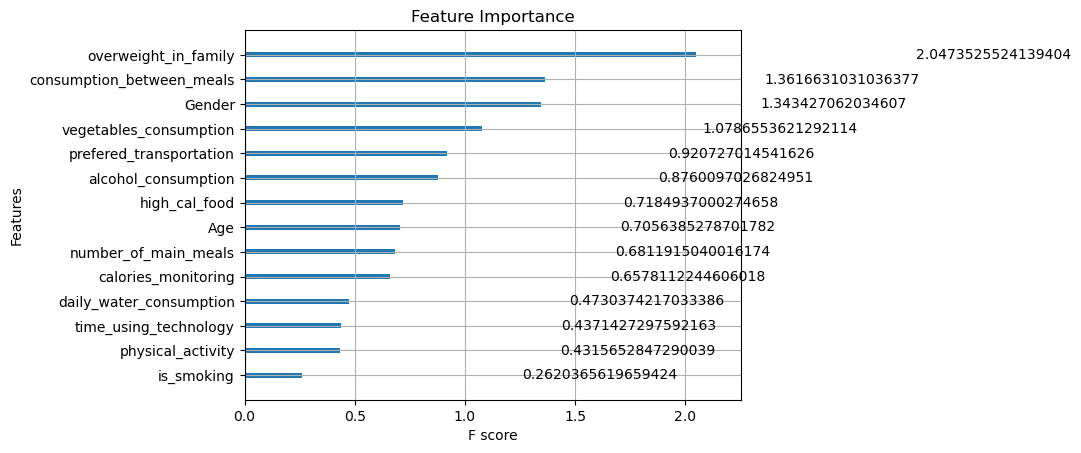

In [7]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain')  # Use 'weight', 'gain', or 'cover'
plt.title("Feature Importance")
plt.show()

In [9]:
# Get feature importance as a dictionary
importance = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to a DataFrame for easier analysis
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                      Feature  Importance
2        overweight_in_family    2.047353
6   consumption_between_meals    1.361663
0                      Gender    1.343427
4      vegetables_consumption    1.078655
13    prefered_transportation    0.920727
12        alcohol_consumption    0.876010
3               high_cal_food    0.718494
1                         Age    0.705639
5        number_of_main_meals    0.681192
9         calories_monitoring    0.657811
8     daily_water_consumption    0.473037
11      time_using_technology    0.437143
10          physical_activity    0.431565
7                  is_smoking    0.262037


In [6]:
data.head()

,Gender,Age,overweight_in_family,high_cal_food,vegetables_consumption,number_of_main_meals,consumption_between_meals,is_smoking,daily_water_consumption,calories_monitoring,physical_activity,time_using_technology,alcohol_consumption,prefered_transportation,BMI_classification
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
